In [3]:
# ============================
# # California Housing Price Prediction
# ----------------------------
# **Objective:** Predict median house values in California districts using district-level features.
# This notebook includes: 
# - Data exploration
# - Preprocessing
# - Simple and Multiple Linear Regression
# - Model evaluation and interpretation
# ============================

# ----------------------------
# Import Libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

import warnings
warnings.filterwarnings("ignore")


In [4]:
# Load Dataset
df = pd.read_csv('data_1.csv')

In [5]:
# Quick overview
df.info()    # Check types & missing values
df.describe() # Statistical summary
df.head(10) # First 10 rows

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  int64  
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY
5,-122.25,37.85,52,919,213.0,413,193,4.0368,269700,NEAR BAY
6,-122.25,37.84,52,2535,489.0,1094,514,3.6591,299200,NEAR BAY
7,-122.25,37.84,52,3104,687.0,1157,647,3.1200,241400,NEAR BAY
8,-122.26,37.84,42,2555,665.0,1206,595,2.0804,226700,NEAR BAY
9,-122.25,37.84,52,3549,707.0,1551,714,3.6912,261100,NEAR BAY


In [6]:
df.isnull().sum().sort_values(ascending=False) # Check missing values per column


total_bedrooms        207
longitude               0
latitude                0
housing_median_age      0
total_rooms             0
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [7]:
# Group by ocean proximity and compute average house value
ocean_prices = df.groupby('ocean_proximity')['median_house_value'].mean().sort_values()
print(ocean_prices)


ocean_proximity
INLAND        124805.392001
<1H OCEAN     240084.285464
NEAR OCEAN    249433.977427
NEAR BAY      259212.311790
ISLAND        380440.000000
Name: median_house_value, dtype: float64


In [8]:
# Assign mean house value per category
category_means = df.groupby('ocean_proximity')['median_house_value'].mean()
print(category_means) 
df['ocean_proximity'] = df['ocean_proximity'].map(category_means)


ocean_proximity
<1H OCEAN     240084.285464
INLAND        124805.392001
ISLAND        380440.000000
NEAR BAY      259212.311790
NEAR OCEAN    249433.977427
Name: median_house_value, dtype: float64


In [9]:
median = df['total_bedrooms'].median()# Fill missing total_bedrooms with median
df['total_bedrooms'].fillna(median, inplace=True)


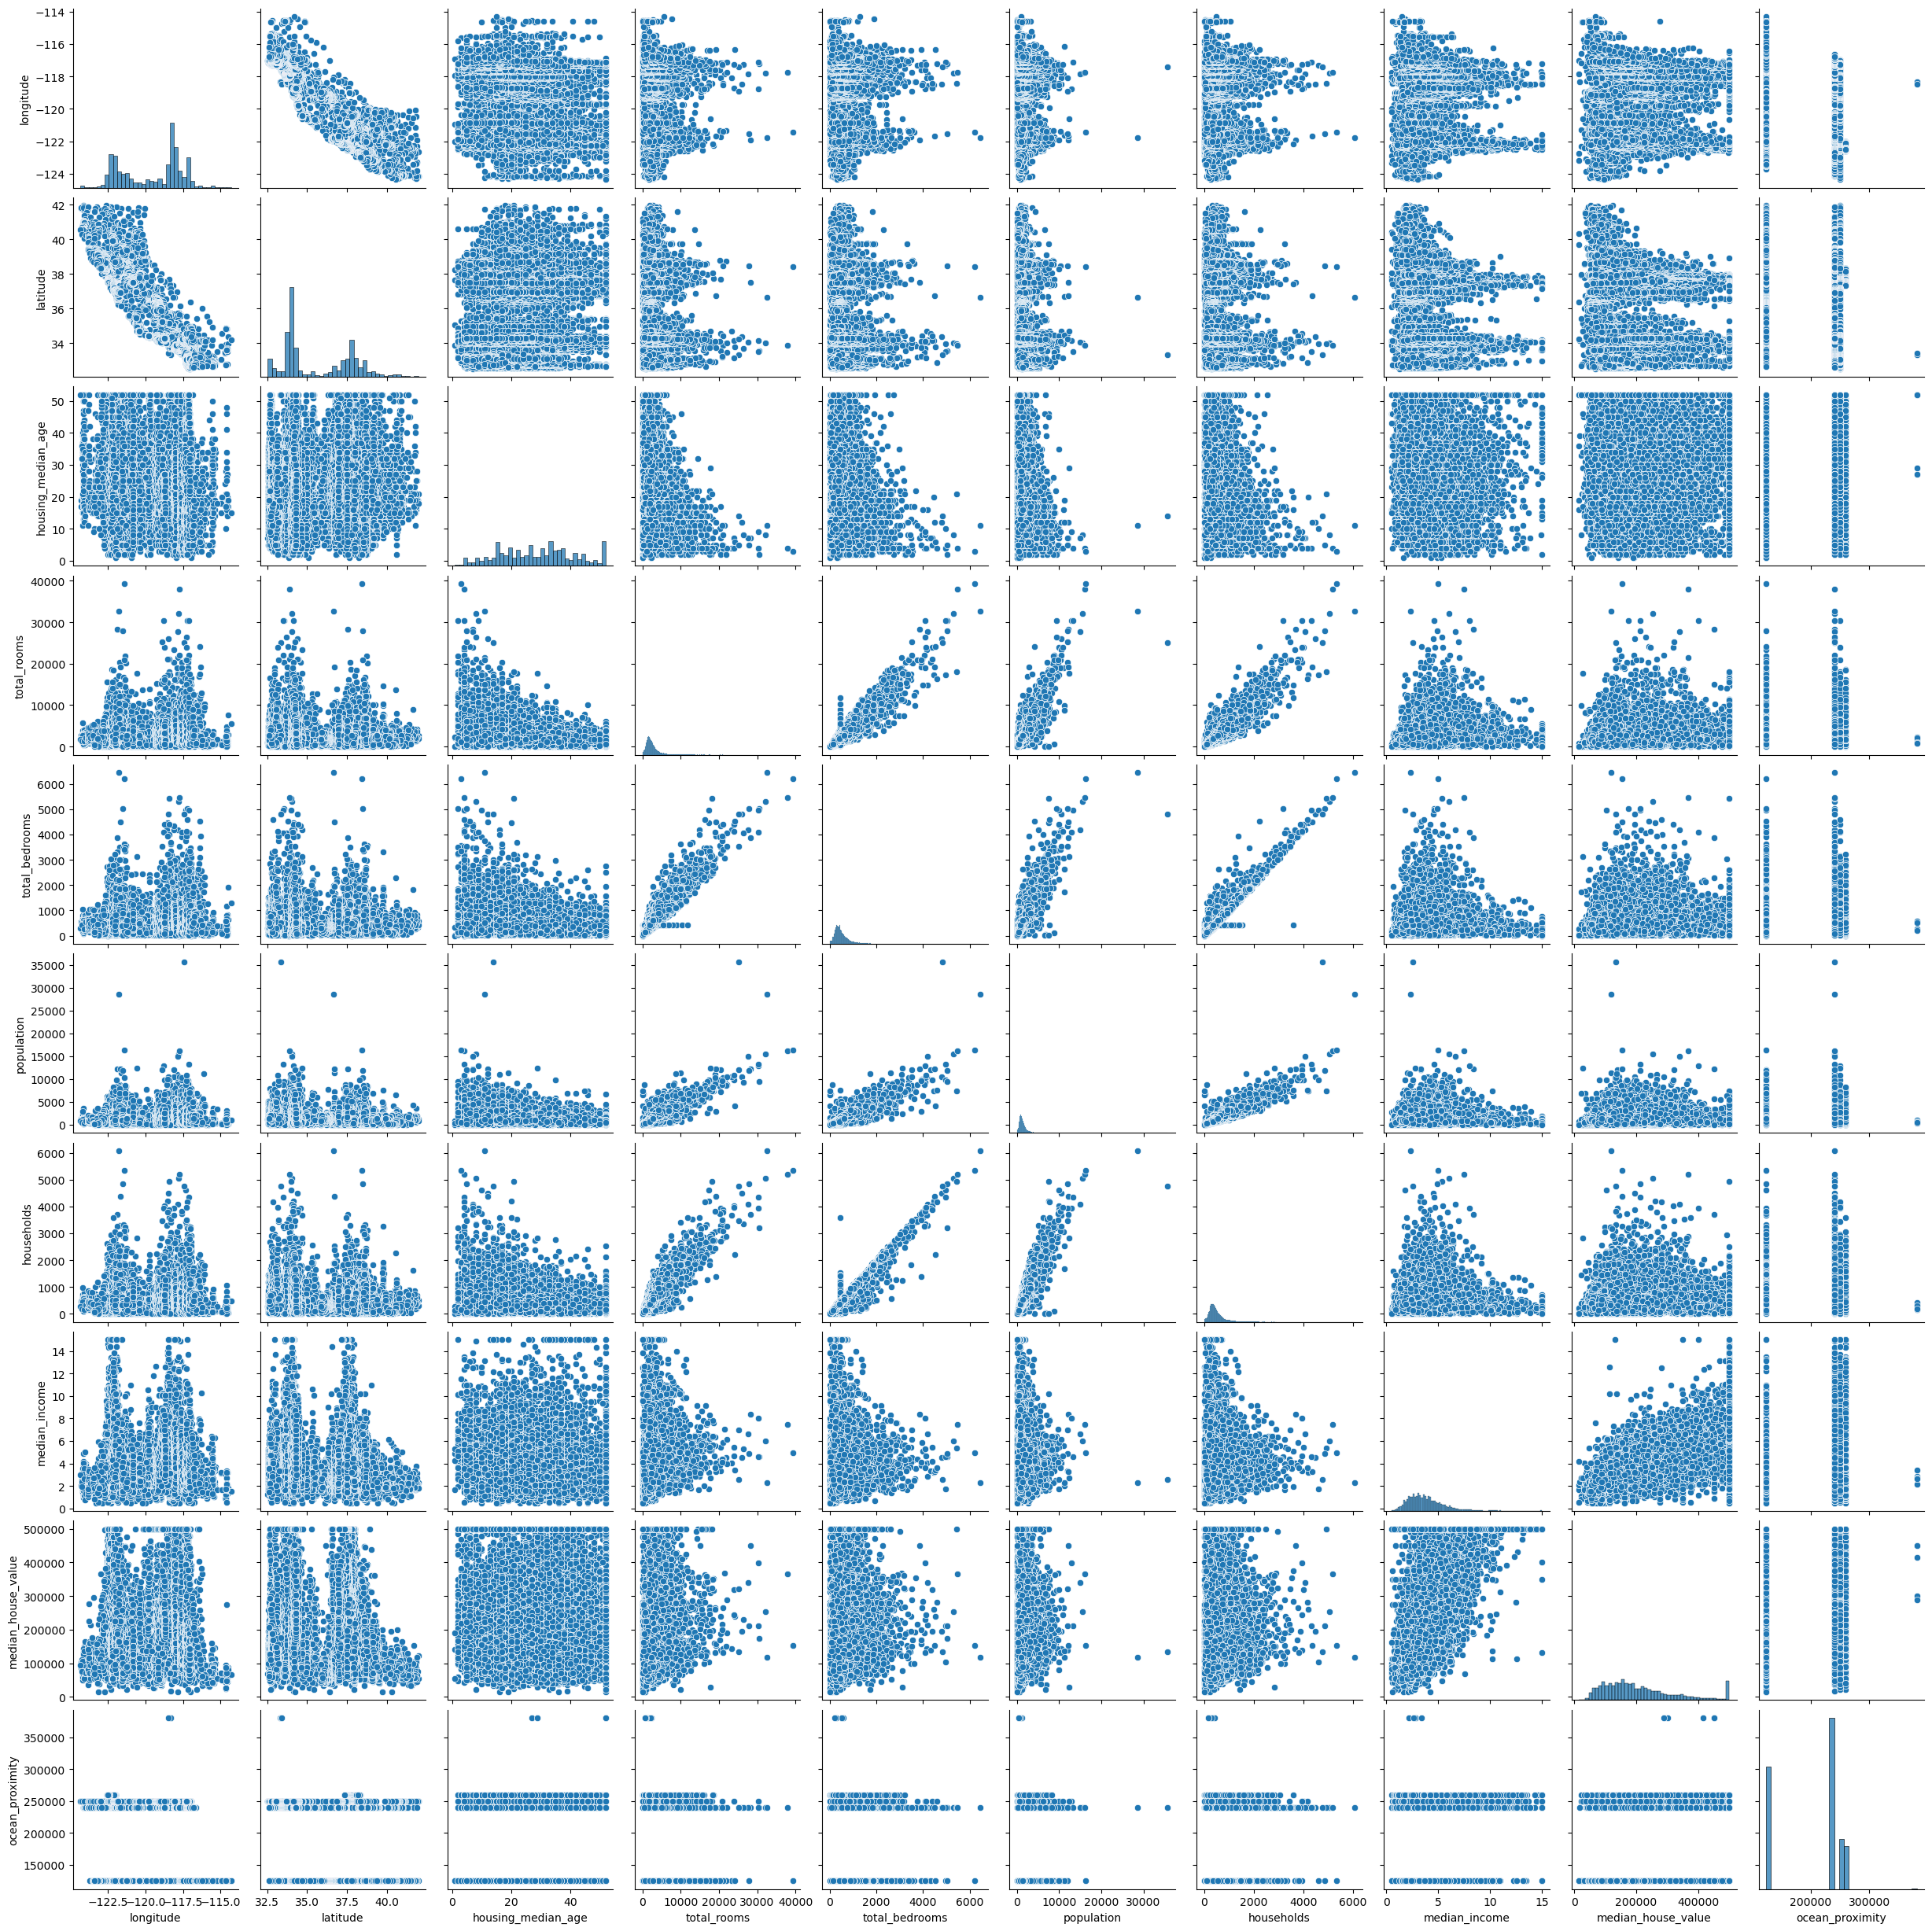

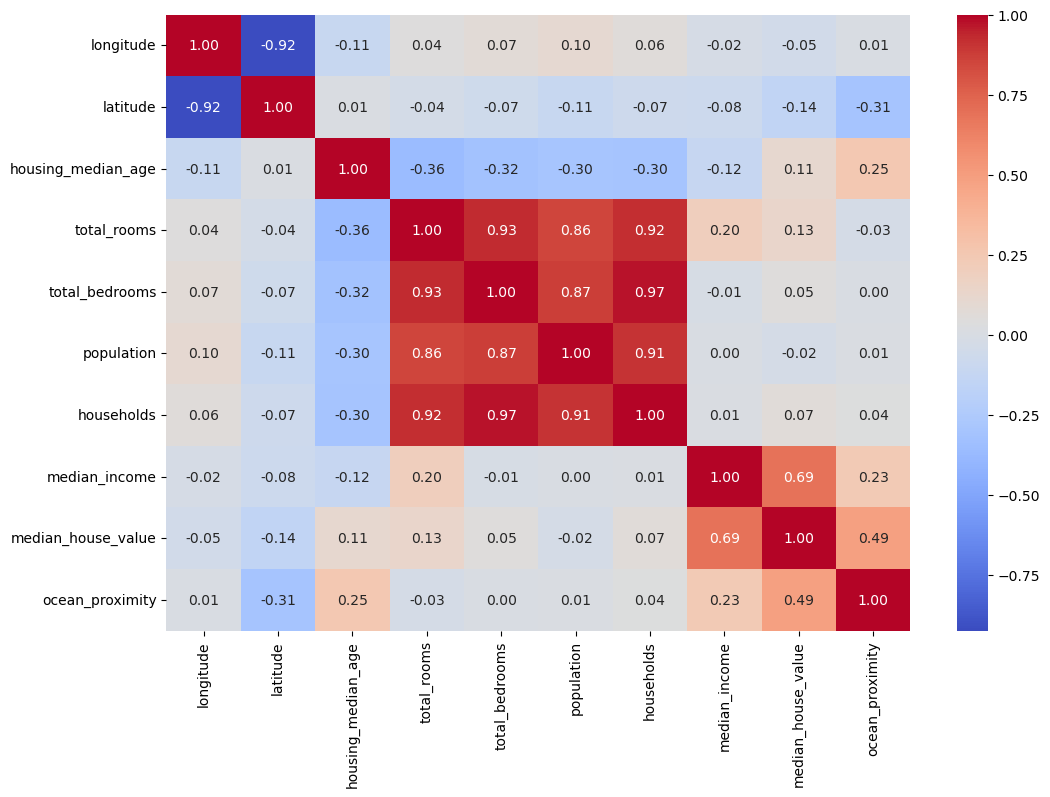

In [10]:
# Exploratory Data Analysis (EDA)
sns.pairplot(df)
plt.show()
#correlation matrix
corr_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.show()

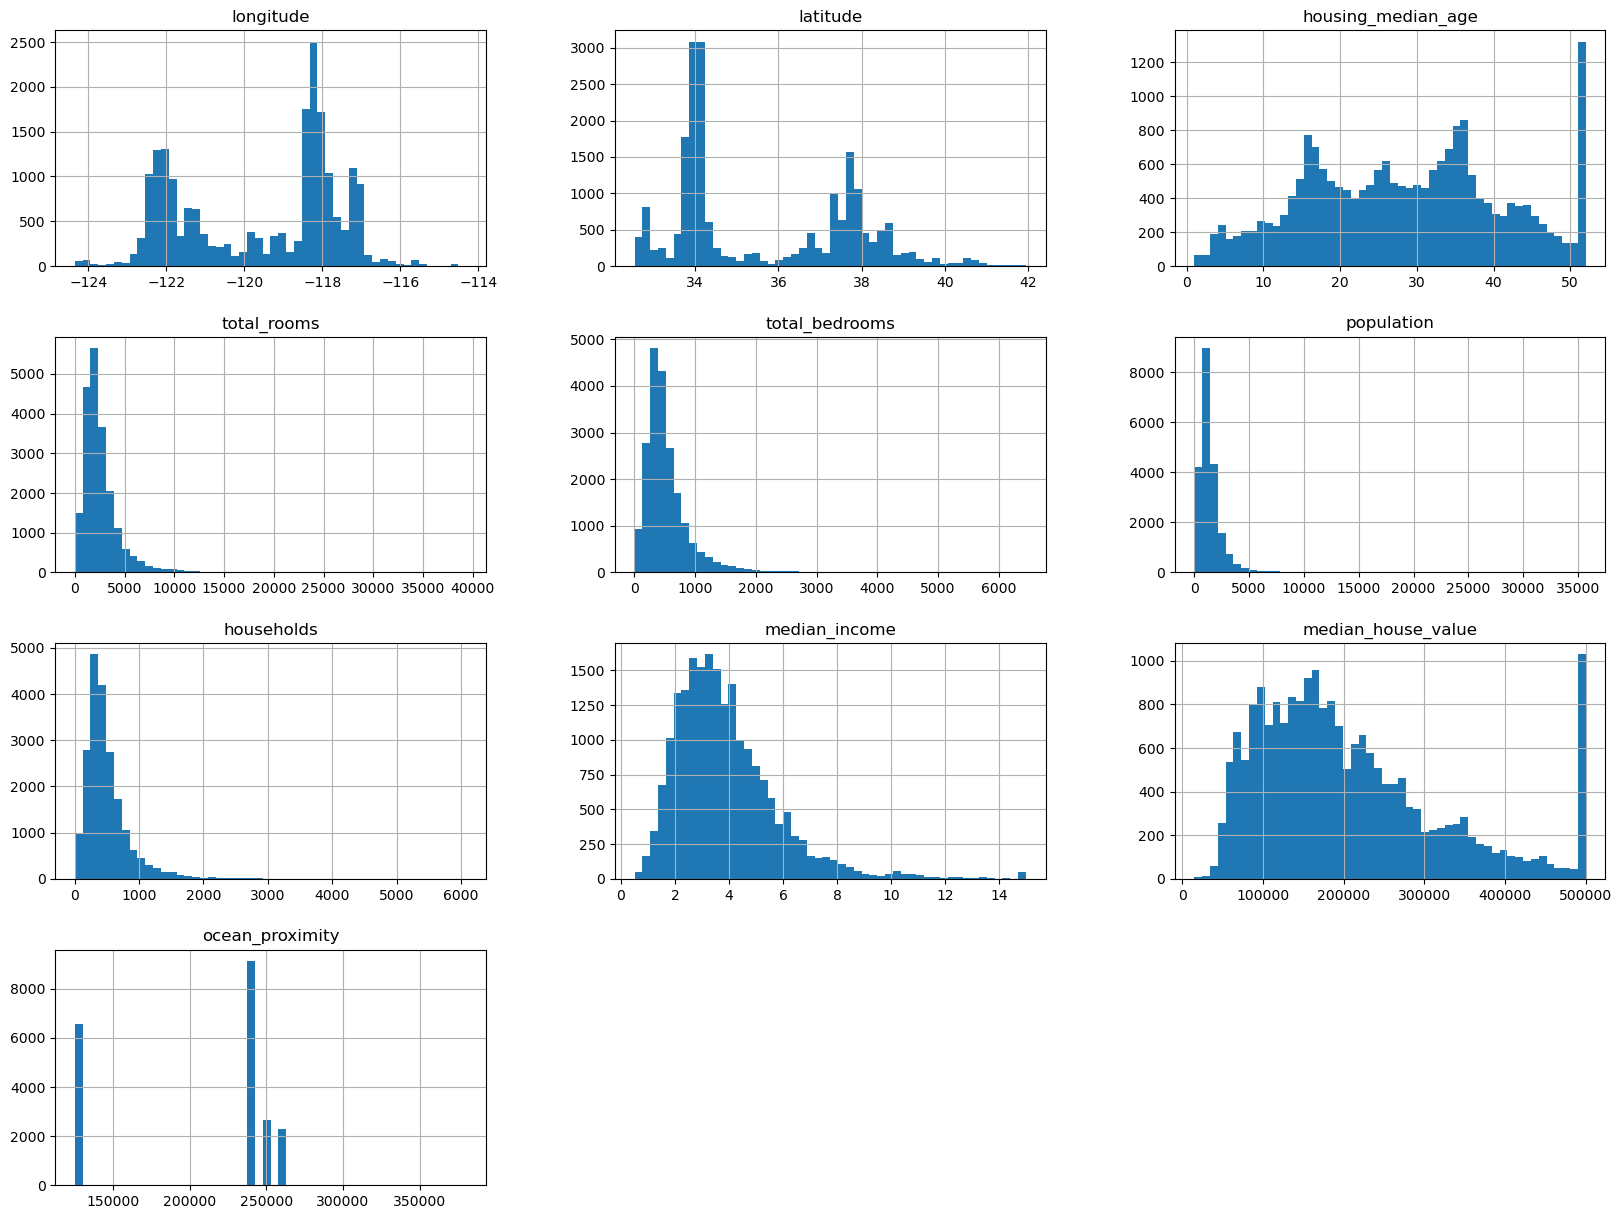

In [12]:
df.hist(figsize=(20,15), bins=50)
plt.show()

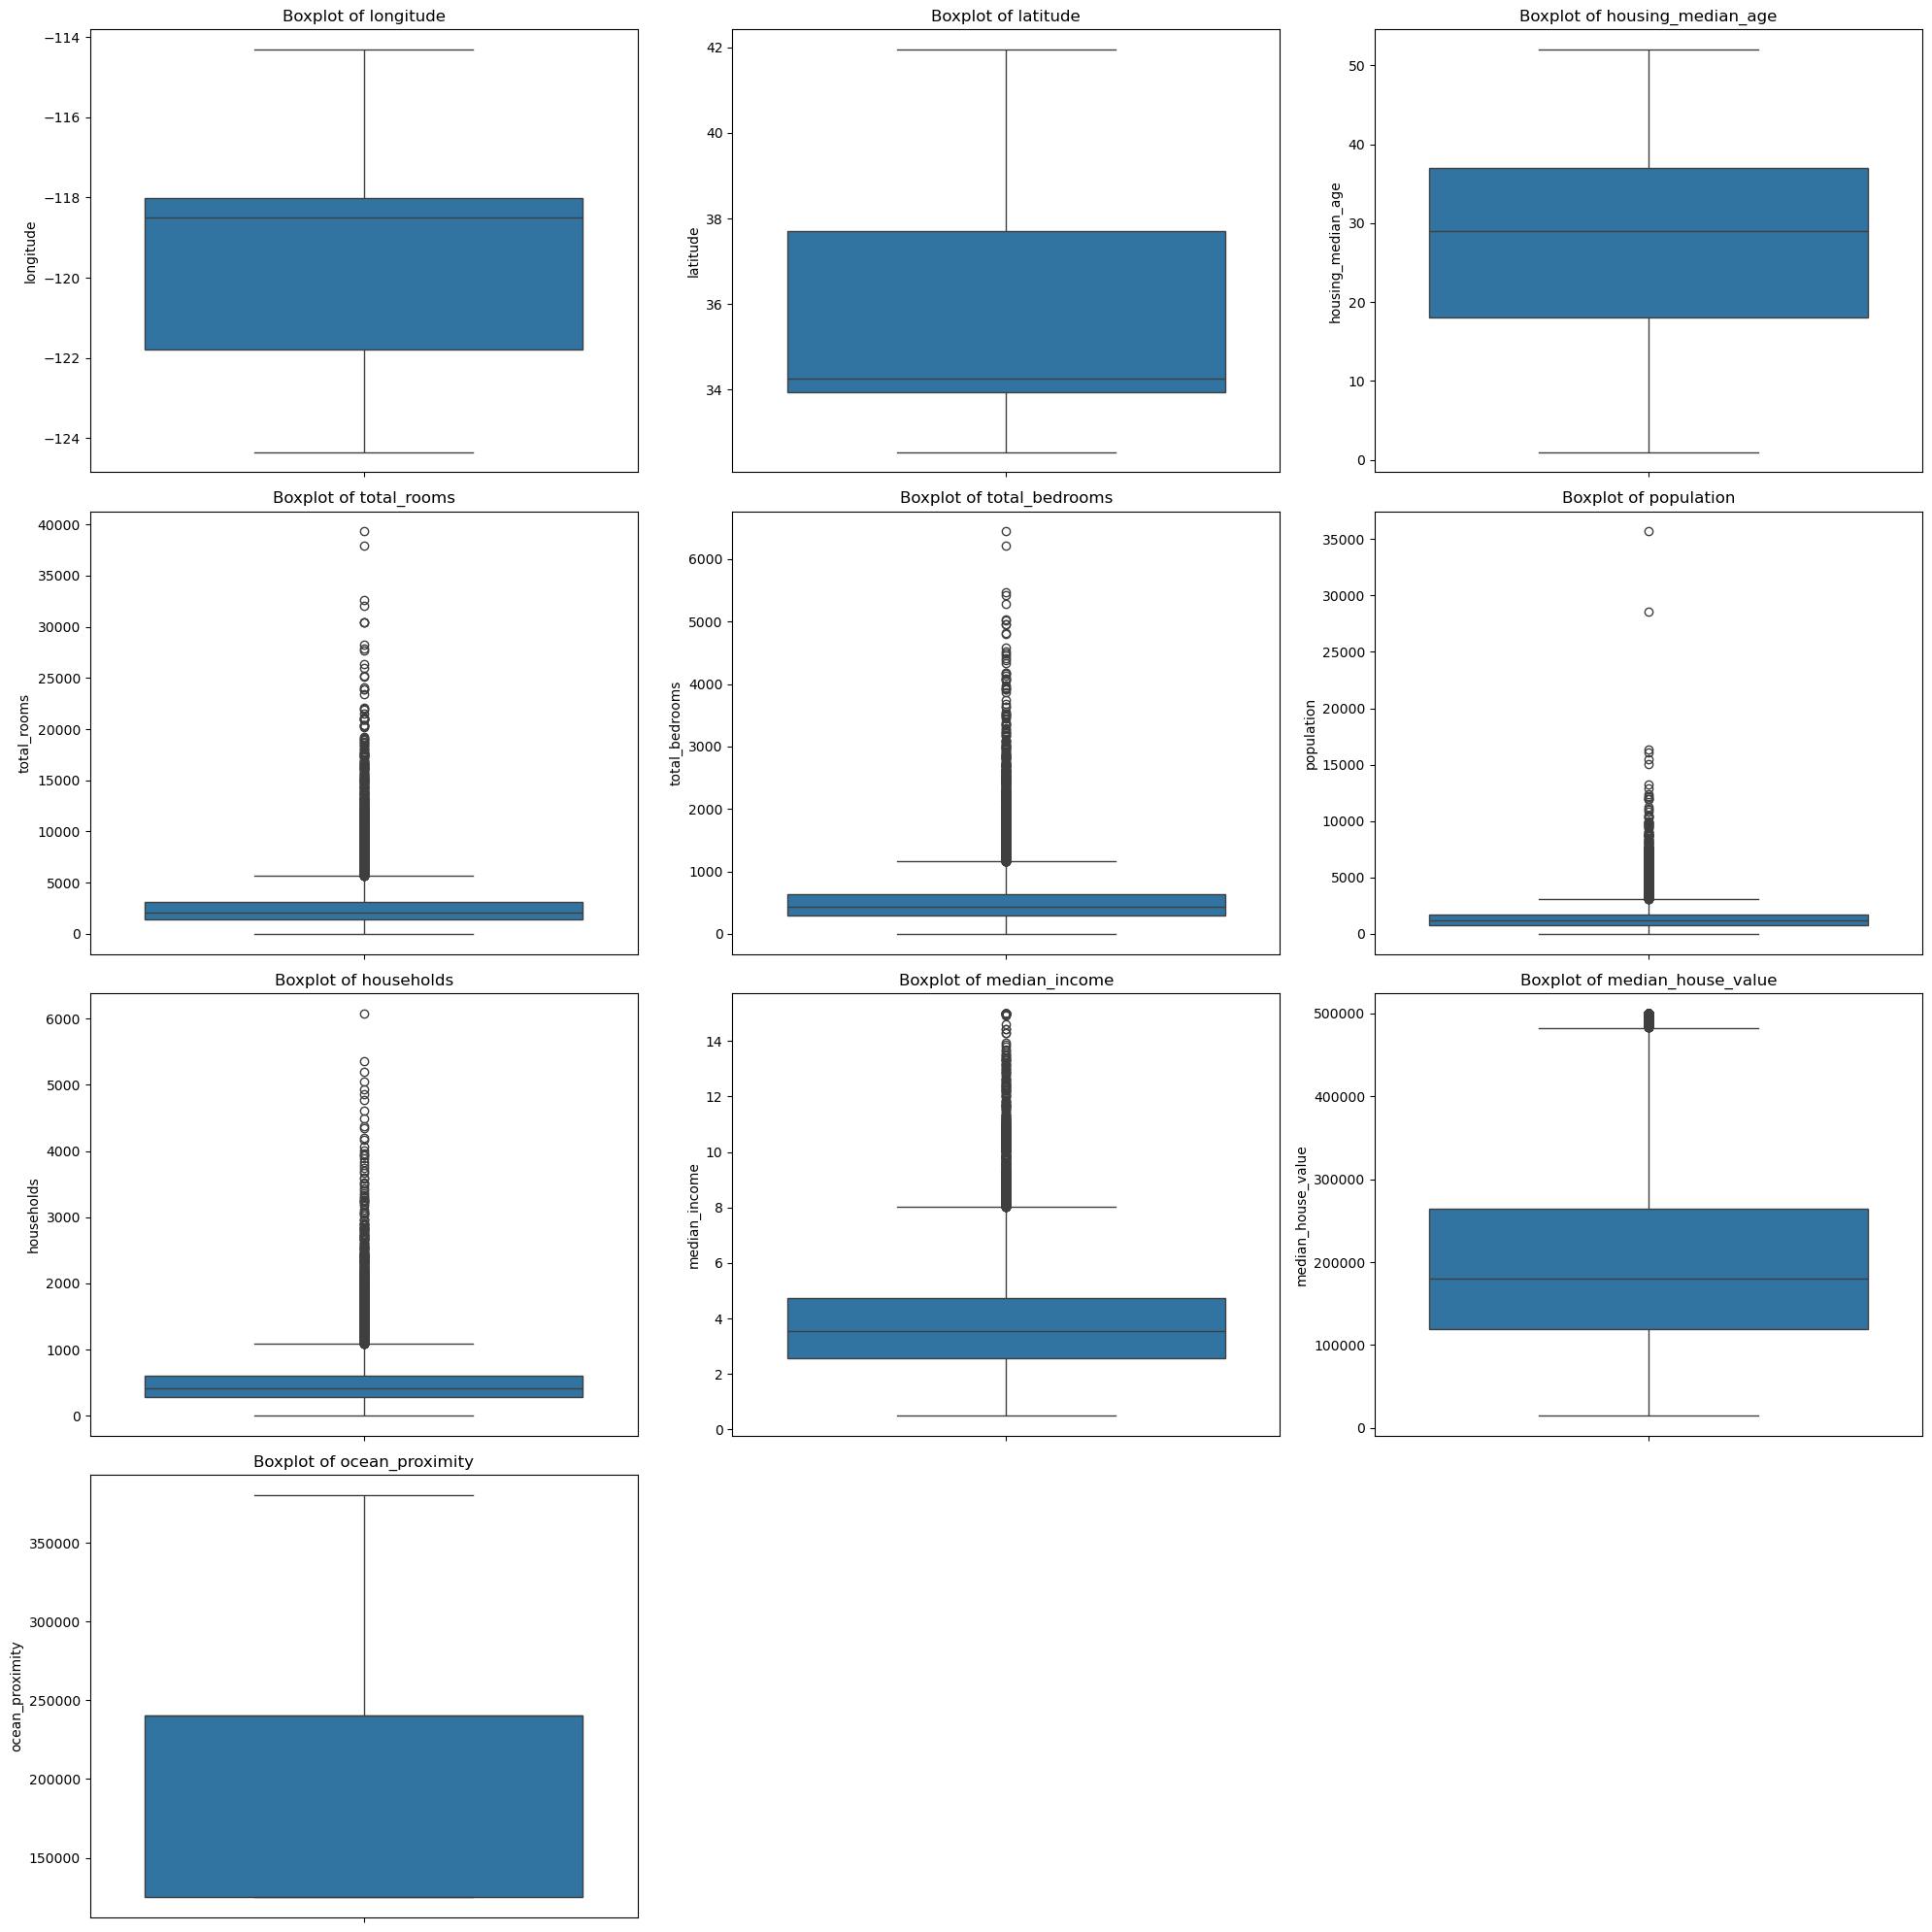

In [24]:
import math

num_cols = df.select_dtypes(include=['float64', 'int64']).columns
n = len(num_cols)

# Calculate rows needed (3 columns per row)
rows = math.ceil(n / 3)

plt.figure(figsize=(20, 5 * rows))

for i, column in enumerate(num_cols, 1):
    plt.subplot(rows, 3, i)
    sns.boxplot(y=df[column])
    plt.title(f'Boxplot of {column}')

plt.tight_layout()
plt.show()



In [26]:
# All numeric features including ocean_proximity score
features = [
    'longitude', 'latitude', 'housing_median_age', 'total_rooms', 'population', 'households', 'median_income'
,'ocean_proximity']

X = df[features]
y = df['median_house_value']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# Model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Predictions
y_pred = lin_reg.predict(X_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.2f}")


RMSE: 68542.13
R²: 0.64
